In [1]:
%load_ext autoreload
%autoreload 2

from evaluation_scripts.base import load_json, get_base_pathes
import pandas as pd
import os
from evaluation_scripts.base import load_pickle_obj
from model_scripts.sensitivity_evaluation import ParameterSetEvaluation, SensitivityAnalysis
from model_scripts.kernel_collector import KernelCollector
import matplotlib.pyplot as plt
from model_scripts.lda_kernel_plotter import KernelPlot
from model_scripts.grid import GridPoint, MakeGrid

date = "16052023"
_, base = get_base_pathes()
path = os.path.join(base, "sensitivity_sim")
name_add = "_clean"

In [2]:
sensitivity = SensitivityAnalysis(path, name_add = name_add, parameter_names = ["turnover",
                                "infection", "cA", "cB", "cS", "cU", "cAB"])
reload = False
if reload:
    sensitivity.load()
else:
    sims = pd.read_pickle(os.path.join(path, "sensitivity_sim"+name_add+".pkl"))
    pars = pd.read_pickle(os.path.join(path, "sensitivity_par"+name_add+".pkl"))
    sensitivity.evaluate_parameter_sets(sims, pars)
    sensitivity.save()

In [3]:
sensitivity.lda()
sensitivity.join_eval_data()

In [4]:
reload_grid = False
grid = MakeGrid(sensitivity, path, d50 = 0.05)
if reload_grid:
    grid.load()
else:
    grid.create_grid_points(sensitivity, 100)
    grid.summarize()
    grid.make_alpha(lower = 0.05, upper = 5)
    grid.save()

-0.6616812940571523
-0.6506373689270097
-0.6395934437968671
-0.6285495186667246
-0.617505593536582
-0.6064616684064394
-0.5954177432762968
-0.5843738181461543
-0.5733298930160118
-0.5622859678858692
-0.5512420427557266
-0.540198117625584
-0.5291541924954415
-0.5181102673652989
-0.5070663422351563
-0.49602241710501377
-0.4849784919748712
-0.4739345668447286
-0.46289064171458605
-0.45184671658444353
-0.4408027914543009
-0.4297588663241584
-0.4187149411940158
-0.40767101606387324
-0.39662709093373066
-0.3855831658035881
-0.3745392406734455
-0.36349531554330294
-0.3524513904131604
-0.34140746528301785
-0.3303635401528753
-0.3193196150227327
-0.30827568989259013
-0.29723176476244756
-0.286187839632305
-0.2751439145021624
-0.26409998937201984
-0.2530560642418773
-0.24201213911173475
-0.23096821398159217
-0.2199242888514496
-0.20888036372130703
-0.19783643859116445
-0.18679251346102188
-0.17574858833087936
-0.1647046632007368
-0.15366073807059422
-0.1426168129404516
-0.13157288781030907
-0.12

In [5]:
scenario1 = {
       "UI_mean":"Combo",
       "infection":0.3, 
       "turnover":.2,
       "cA":0.053,
       "cB":0.053,
       "cS":0.745,
       "cU":0.149,
       "cAB":0,
       "name":"Scenario1"}
scenario2 = {
       "UI_mean":"Combo",
       "infection":0.35,
       "turnover":0.2,
       "cA":0.106,
       "cB":0.106,
       "cS":0.586,
       "cU":0.149,
       "cAB":0.053,
       "name":"Scenario2"}
scenario3 = {
       "UI_mean":"Combo",
       "infection":0.25,
       "turnover":.5,
       "cA":0.5,
       "cB":0.5,
       "cS":0,
       "cU":0,
       "cAB":0,
       "name":"Scenario3"}
experiments = pd.DataFrame().from_dict([scenario1, scenario2, scenario3])
experiments


,UI_mean,infection,turnover,cA,cB,cS,cU,cAB,name
0,Combo,0.30,0.2,0.053,0.053,0.745,0.149,0.000,Scenario1
1,Combo,0.35,0.2,0.106,0.106,0.586,0.149,0.053,Scenario2
2,Combo,0.25,0.5,0.500,0.500,0.000,0.000,0.000,Scenario3


/var/folders/f7/ks4rl3915yj6crhznly5p28h0000gq/T/ipykernel_22251/3593991995.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  self.ax = sns.scatterplot(data=df, x="ldaX", y="ldaY", s = markersize,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGB

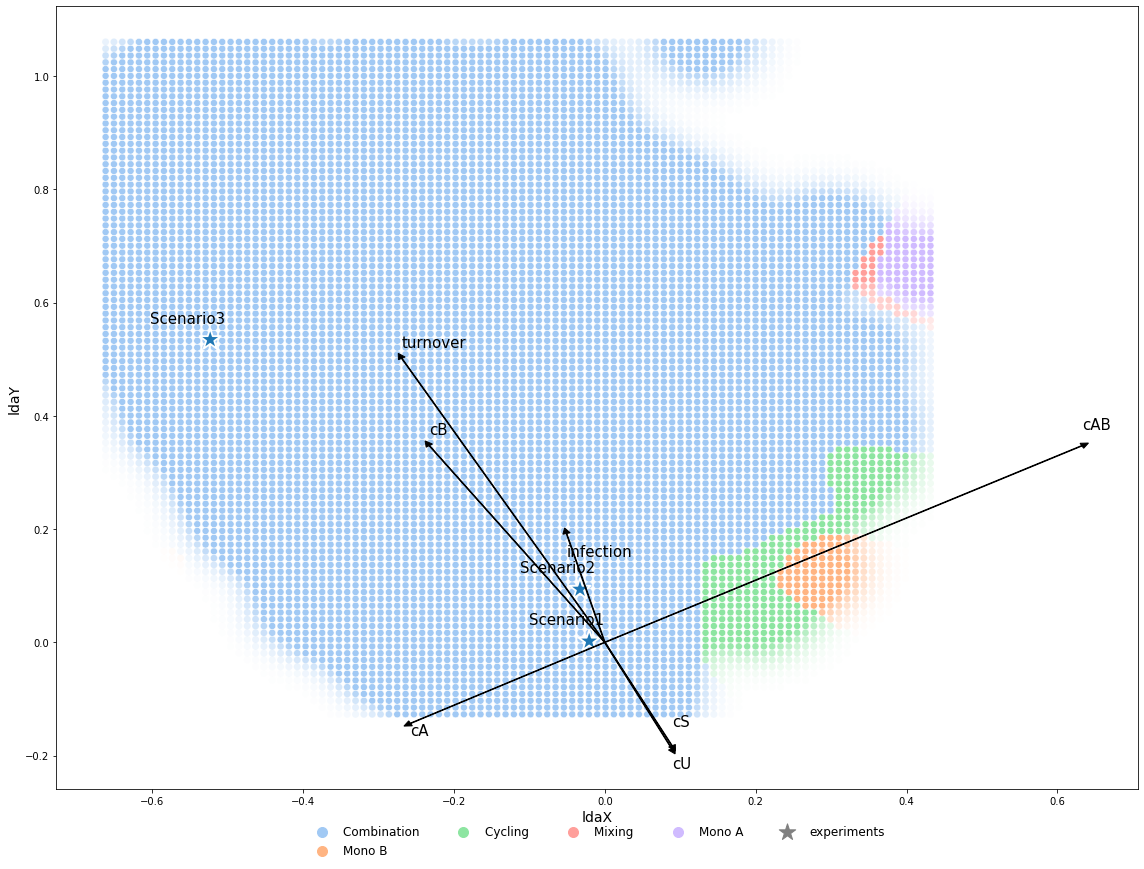

In [8]:
import seaborn as sns


class ScatterPlot:
    def __init__(self, grid, figsize = (16,12), strategy_colors = False, palette = "pastel"):
        self.grid = grid
        self.summary = grid.summary
        self.ax = plt.subplots(figsize = (16,12))
        self.data = grid.summary[(grid.summary.alpha > 0)]
        self.strategies = self.data.winning_strategy.unique()
        if strategy_colors:
            self.strategy_colors = startegy_colors
        else:
            colors = sns.color_palette(palette, len(self.strategies))
            self.strategy_colors = dict(zip(self.strategies, colors))
        
    def scatterplot(self, fontsize=14, markersize = 100):
        for alpha in self.summary.alpha.unique():
            df = self.data[self.data.alpha == alpha]
            self.ax = sns.scatterplot(data=df, x="ldaX", y="ldaY", s = markersize,
                            hue="winning_strategy", alpha=alpha, palette = self.strategy_colors, legend=False)
        plt.xlabel('ldaX', fontsize = fontsize)
        plt.ylabel('ldaY', fontsize = fontsize)
        
    def correct_legend(self, fontsize = 12, ncol = 5, markersize = 100):
        legend = plt.legend()
        if legend:
            legend.remove()
        for strategy, color in self.strategy_colors.items():
            plt.scatter([], [], c=color, label=f"{strategy}  ", s=markersize, marker='o')   
        if hasattr(self, 'experiments'):
            plt.scatter([], [], c = "grey", label="experiments", s = 3*markersize, marker = "*")
        
        plt.legend(frameon=False, fontsize=12, loc='lower center', ncol = ncol, bbox_to_anchor=(0.5, -0.1))
        plt.tight_layout()
    
    def plot_experiments(self, experiments, markersize = 500, edgecolors = "black", yspace = 0.03, xspace = -.08):
        self.experiments = experiments = self.get_lda_XY(experiments)
        sns.scatterplot(data=experiments, x="ldaX", y="ldaY", s = markersize, marker = "*",
                hue="UI_mean", alpha=1,  legend=False)
        directions = self.grid.parameter_directions
        params = directions.columns
        x = directions.loc[0,]
        y = directions.loc[1,]
        for i, exp in experiments.iterrows():
            ldaX = (exp[params]*x).sum()
            ldaY = (exp[params]*y).sum()
            self.ax.text(ldaX + xspace, ldaY + yspace, exp["name"], color="black", fontsize=15)
        
    def get_lda_XY(self, df):
        lda_directions = self.grid.parameter_directions
        cols = lda_directions.columns
        data = df[cols]
        pX = lda_directions.loc[0, ]
        pY = lda_directions.loc[1, ]
        df["ldaX"] = data.apply(lambda x: (x*pX).sum(), axis = 1)
        df["ldaY"] = data.apply(lambda x: (x*pY).sum(), axis = 1)
        return df
    
    def plot_original_axes(self, text_placement_y, arrow_length=0.75, adjust = 1, head_adjust = 0.01):
        lda_directions = self.grid.parameter_directions 
        parameter_names = lda_directions.columns
        for param in parameter_names:
            color = 'black'  # Set the color to black
            direction = lda_directions[param].values
            self.ax.arrow(0, 0, direction[0] * arrow_length, direction[1] * arrow_length,
                          head_width=head_adjust, head_length=head_adjust, fc=color, ec=color)
            
            self.ax.text(direction[0] * arrow_length * adjust, direction[1]
                         * arrow_length *adjust + text_placement_y[param], param, color=color, fontsize=15)

    def savefig(self, name):
        fig_path = os.path.join(self.grid.path, name)
        plt.savefig(fig_path)

scatterplot = ScatterPlot(grid)
scatterplot.scatterplot(markersize=50)
scatterplot.plot_experiments(experiments)

text_placement_y = {"turnover":.02, "infection":-.04, "cA":-.02, "cB":.02, "cS":.04, "cU":-.04, "cAB":.03}
scatterplot.plot_original_axes(text_placement_y)
scatterplot.correct_legend()
scatterplot.savefig("sensitivity_lda_kernel_eval_clean.pdf")



In [7]:
from collections import Counter

Counter(sensitivity.evaluations_df.winning_group)

Counter({'Combination': 84740,
         'Combination-Mono A': 1770,
         'Combination-Cycling-Mixing-Mono B': 470,
         'Mono A': 3750,
         'Combination-Cycling': 3740,
         'Combination-Mixing-Mono B': 60,
         'Combination-Cycling-Mixing': 1670,
         'None': 610,
         'Combination-Cycling-Mixing-Mono A': 710,
         'Cycling-Mixing': 100,
         'Combination-Mixing-Mono A': 100,
         'Combination-Mono B': 1400,
         'Cycling-Mixing-Mono A': 110,
         'Mixing-Mono A': 90,
         'Cycling': 40,
         'Mixing-Mono B': 50,
         'Combination-Cycling-Mono B': 180,
         'Combination-Mixing': 110,
         'Cycling-Mixing-Mono B': 90,
         'Combination-Cycling-Mono A': 170,
         'Mixing': 40})